# Mustererkennung in Funkmessdaten

## Aufgabe 1: Laden der Datenbank in Jupyter Notebook

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp

In [2]:
hdfs = pd.HDFStore("../../data/raw/henrik/TestMessungen_NEU.hdf")

In [3]:
hdfs.keys

<bound method HDFStore.keys of <class 'pandas.io.pytables.HDFStore'>
File path: ../../data/raw/henrik/TestMessungen_NEU.hdf
/x1/t1/trx_1_2            frame        (shape->[227,12009])
/x1/t1/trx_1_4            frame        (shape->[229,12009])
/x1/t1/trx_2_3            frame        (shape->[226,12009])
/x1/t1/trx_3_1            frame        (shape->[233,12009])
/x1/t1/trx_3_4            frame        (shape->[226,12009])
/x1/t1/trx_4_2            frame        (shape->[230,12009])
/x1/t2/trx_1_2            frame        (shape->[223,12009])
/x1/t2/trx_1_4            frame        (shape->[220,12009])
/x1/t2/trx_2_3            frame        (shape->[218,12009])
/x1/t2/trx_3_1            frame        (shape->[221,12009])
/x1/t2/trx_3_4            frame        (shape->[218,12009])
/x1/t2/trx_4_2            frame        (shape->[221,12009])
/x1/t3/trx_1_2            frame        (shape->[246,12009])
/x1/t3/trx_1_4            frame        (shape->[250,12009])
/x1/t3/trx_2_3            frame     

## Aufgabe 2: Inspektion eines einzelnen Dataframes

In [4]:
df1 = hdfs.get('/x1/t1/trx_1_2')

In [5]:
df1.head(5)

,index,Timestamp,trx_1_2_ifft_0,trx_1_2_ifft_1,trx_1_2_ifft_2,trx_1_2_ifft_3,trx_1_2_ifft_4,trx_1_2_ifft_5,trx_1_2_ifft_6,trx_1_2_ifft_7,...,trx_4_2_ifft_1992,trx_4_2_ifft_1993,trx_4_2_ifft_1994,trx_4_2_ifft_1995,trx_4_2_ifft_1996,trx_4_2_ifft_1997,trx_4_2_ifft_1998,trx_4_2_ifft_1999,trx_4_2_ts,target
0,0,1.492291e+09,0.057569,0.057136,0.056675,0.056187,0.055674,0.055137,0.054577,0.053996,...,0.030439,0.030293,0.030121,0.029925,0.029705,0.029460,0.029193,0.028902,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"
1,1,1.492291e+09,0.047302,0.046338,0.045374,0.044412,0.043456,0.042508,0.041572,0.040651,...,0.036359,0.036123,0.035864,0.035581,0.035275,0.034946,0.034596,0.034225,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"
2,2,1.492291e+09,0.034838,0.033317,0.031765,0.030187,0.028583,0.026958,0.025314,0.023656,...,0.031202,0.030878,0.030531,0.030161,0.029768,0.029353,0.028916,0.028459,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"
3,3,1.492291e+09,0.053769,0.053513,0.053260,0.053011,0.052767,0.052529,0.052299,0.052078,...,0.035503,0.035381,0.035234,0.035061,0.034861,0.034637,0.034387,0.034113,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"
4,4,1.492291e+09,0.042299,0.041589,0.040935,0.040344,0.039823,0.039379,0.039017,0.038745,...,0.034995,0.034670,0.034319,0.033942,0.033540,0.033112,0.032661,0.032187,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"


In [6]:
# Little function to retrieve sender-receiver tuple from df columns
import re
def extract_snd_rcv(df):
    regex = r"trx_[1-4]_[1-4]_ifft_[0-9]*"
    snd_rcv = {x[4:7] for x in df.columns if re.search(regex, x)}
    return [(x[0],x[-1]) for x in snd_rcv]

In [7]:
def get_column_counts(snd_rcv, df):
    col_counts = {}
    for snd,rcv in snd_rcv:
        col_counts['trx_{}_{}_ifft'.format(snd, rcv)] = len([i for i, word in enumerate(list(df.columns)) if word.startswith('trx_{}_{}_ifft'.format(snd, rcv))])
    return col_counts

In [8]:
df1_snd_rcv = extract_snd_rcv(df1)
cc = get_column_counts(df1_snd_rcv, df1)

pp.pprint(cc)
print("Sum of measure columns: %i" % sum(cc.values()))
print("# of other columns: %i" % (len(df1.columns) - sum(cc.values())))

{'trx_1_2_ifft': 2000,
 'trx_2_1_ifft': 2000,
 'trx_3_1_ifft': 2000,
 'trx_3_2_ifft': 2000,
 'trx_4_1_ifft': 2000,
 'trx_4_2_ifft': 2000}
Sum of measure columns: 12000
# of other columns: 9


In [9]:
[col for col in df1.columns if 'ifft' not in col]

['index',
 'Timestamp',
 'trx_1_2_ts',
 'trx_2_1_ts',
 'trx_3_1_ts',
 'trx_3_2_ts',
 'trx_4_1_ts',
 'trx_4_2_ts',
 'target']

In [10]:
print(df1['target'].unique())
print("# Unique values in target: %i" % len(df1['target'].unique()))

['Empty_0.0,0.0_0.0,0.0' 'Standing_1.0,1.0_1.0,1.0' 'Step_1.0,1.0_1.0,2.0'
 'Standing_1.0,2.0_1.0,2.0' 'Step_1.0,2.0_2.0,2.0'
 'Standing_2.0,2.0_2.0,2.0' 'Step_2.0,2.0_2.0,1.0'
 'Standing_2.0,1.0_2.0,1.0' 'Step_2.0,1.0_1.0,1.0'
 'Walking_0.0,0.0_0.0,0.0']
# Unique values in target: 10


In [11]:
df2 = hdfs.get('/x1/t1/trx_1_4')
df2.head()

,index,Timestamp,trx_1_4_ifft_0,trx_1_4_ifft_1,trx_1_4_ifft_2,trx_1_4_ifft_3,trx_1_4_ifft_4,trx_1_4_ifft_5,trx_1_4_ifft_6,trx_1_4_ifft_7,...,trx_4_1_ifft_1992,trx_4_1_ifft_1993,trx_4_1_ifft_1994,trx_4_1_ifft_1995,trx_4_1_ifft_1996,trx_4_1_ifft_1997,trx_4_1_ifft_1998,trx_4_1_ifft_1999,trx_4_1_ts,target
0,0,1.492291e+09,0.021636,0.021845,0.022040,0.022221,0.022388,0.022540,0.022677,0.022798,...,0.013412,0.012879,0.012468,0.012188,0.012047,0.012049,0.012190,0.012462,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"
1,1,1.492291e+09,0.020806,0.020952,0.021081,0.021192,0.021287,0.021363,0.021422,0.021462,...,0.015530,0.015678,0.015933,0.016286,0.016729,0.017254,0.017849,0.018505,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"
2,2,1.492291e+09,0.030507,0.030675,0.030819,0.030940,0.031038,0.031111,0.031160,0.031184,...,0.010804,0.010567,0.010535,0.010708,0.011072,0.011607,0.012286,0.013082,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"
3,3,1.492291e+09,0.027926,0.028066,0.028187,0.028288,0.028369,0.028430,0.028470,0.028489,...,0.018073,0.017580,0.017163,0.016826,0.016573,0.016408,0.016331,0.016341,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"
4,4,1.492291e+09,0.021023,0.021285,0.021528,0.021752,0.021956,0.022141,0.022305,0.022449,...,0.016200,0.016055,0.016017,0.016085,0.016256,0.016524,0.016882,0.017323,1.488963e+12,"Empty_0.0,0.0_0.0,0.0"


In [12]:
import re
df2_snd_rcv = extract_snd_rcv(df2)
cc = get_column_counts(df2_snd_rcv, df2)
pp.pprint(cc)
print("Sum of measure columns: %i" % sum(cc.values()))
print("# of other columns: %i" % (len(df2.columns) - sum(cc.values())))

{'trx_1_4_ifft': 2000,
 'trx_2_1_ifft': 2000,
 'trx_2_4_ifft': 2000,
 'trx_3_1_ifft': 2000,
 'trx_3_4_ifft': 2000,
 'trx_4_1_ifft': 2000}
Sum of measure columns: 12000
# of other columns: 9


In [13]:
[col for col in df2.columns if 'ifft' not in col]

['index',
 'Timestamp',
 'trx_1_4_ts',
 'trx_2_1_ts',
 'trx_2_4_ts',
 'trx_3_1_ts',
 'trx_3_4_ts',
 'trx_4_1_ts',
 'target']

In [14]:
print(df2['target'].unique())
print("# Unique values in target: %i" % len(df2['target'].unique()))

['Empty_0.0,0.0_0.0,0.0' 'Standing_1.0,1.0_1.0,1.0' 'Step_1.0,1.0_1.0,2.0'
 'Standing_1.0,2.0_1.0,2.0' 'Step_1.0,2.0_2.0,2.0'
 'Standing_2.0,2.0_2.0,2.0' 'Step_2.0,2.0_2.0,1.0'
 'Standing_2.0,1.0_2.0,1.0' 'Step_2.0,1.0_1.0,1.0'
 'Walking_0.0,0.0_0.0,0.0']
# Unique values in target: 10


## Aufgabe 3: Visualisierung & Groundtruth-Label

### Visualisierung

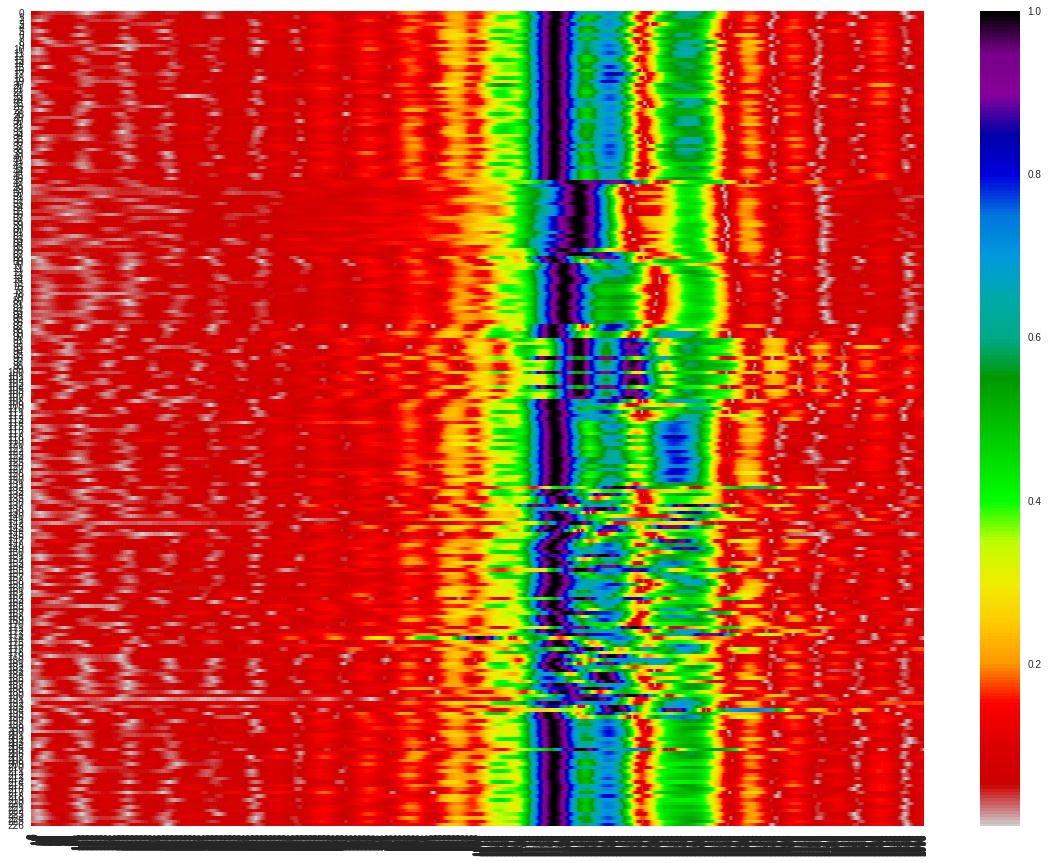

In [15]:
plt.figure(figsize=(20, 15))
ax = sns.heatmap(df1.loc[:,'trx_1_2_ifft_0':'trx_1_2_ifft_1999'].values, cmap='nipy_spectral_r')

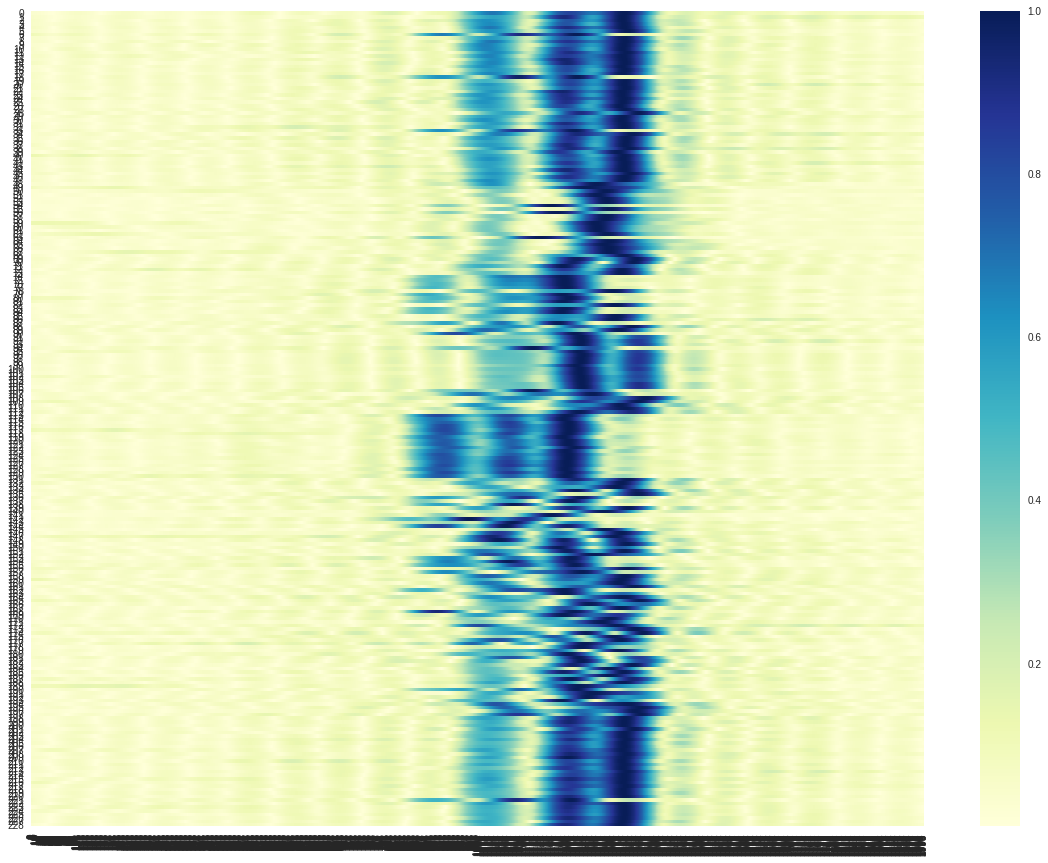

In [16]:
plt.figure(figsize=(20, 15))
ax = sns.heatmap(df2.loc[:,'trx_2_4_ifft_0':'trx_2_4_ifft_1999'].values, cmap='YlGnBu')

### Groundtruth-Label anpassen

In [17]:
# Iterating over hdfs data and creating interim data presentation stored in data/interim/henrik/testmessungen_interim.hdf
# Interim data representation contains aditional binary class (binary_target - encoding 0=empty and 1=not empty)
# and multi class target (multi_target - encoding 0-9 for each possible class)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

interim_path = '../../data/interim/henrik/01_testmessungen.hdf'

def binary_mapper(df):
    
    def map_binary(target):
        if target.startswith('Empty'):
            return 0
        else:
            return 1
    
    df['binary_target'] = pd.Series(map(map_binary, df['target']))
    
    
def multiclass_mapper(df):
    le.fit(df['target'])
    df['multi_target'] = le.transform(df['target'])
    
for key in hdfs.keys():
    df = hdfs.get(key)
    binary_mapper(df)
    multiclass_mapper(df)
    df.to_hdf(interim_path, key)

hdfs.close()

## Aufgabe 4: Einfacher Erkenner mit Hold-Out-Validierung

In [18]:
from evaluation import *
from filters import *
from utility import *
from features import *

In [19]:
hdfs = pd.HDFStore('../../data/interim/henrik/01_testmessungen.hdf')

In [20]:
# generate datasets
tst = ['1','2','3']
tst_ds = []

for t in tst:

    df_tst = hdfs.get('/x1/t'+t+'/trx_3_1')
    lst = df_tst.columns[df_tst.columns.str.contains('_ifft_')]
    
    #df_tst_cl,_ = distortion_filter(df_tst_cl)
    
    groups = get_trx_groups(df_tst)
    df_std = rf_grouped(df_tst, groups=groups, fn=rf_std_single, label='target')
    df_mean = rf_grouped(df_tst, groups=groups, fn=rf_mean_single)
    
    df_p2p = rf_grouped(df_tst, groups=groups, fn=rf_ptp_single) # added p2p feature
    
    df_all = pd.concat( [df_std, df_mean, df_p2p], axis=1 ) # added p2p feature
    
    df_all = cf_std_window(df_all, window=4, label='target')
    
    df_tst_sum = generate_class_label_presence(df_all, state_variable='target')
    
    # remove index column
    df_tst_sum = df_tst_sum[df_tst_sum.columns.values[~df_tst_sum.columns.str.contains('index')].tolist()]
    print('Columns in Dataset:',t)
    print(df_tst_sum.columns)
    

    tst_ds.append(df_tst_sum.copy())

Columns in Dataset: 1
Index(['col_std_rf_std_trx_1_3_ifft_0', 'col_std_rf_std_trx_2_1_ifft_0',
       'col_std_rf_std_trx_2_3_ifft_0', 'col_std_rf_std_trx_3_1_ifft_0',
       'col_std_rf_std_trx_4_1_ifft_0', 'col_std_rf_std_trx_4_3_ifft_0',
       'col_std_rf_mean_trx_1_3_ifft_0', 'col_std_rf_mean_trx_2_1_ifft_0',
       'col_std_rf_mean_trx_2_3_ifft_0', 'col_std_rf_mean_trx_3_1_ifft_0',
       'col_std_rf_mean_trx_4_1_ifft_0', 'col_std_rf_mean_trx_4_3_ifft_0',
       'col_std_rf_ptp_trx_1_3_ifft_0', 'col_std_rf_ptp_trx_2_1_ifft_0',
       'col_std_rf_ptp_trx_2_3_ifft_0', 'col_std_rf_ptp_trx_3_1_ifft_0',
       'col_std_rf_ptp_trx_4_1_ifft_0', 'col_std_rf_ptp_trx_4_3_ifft_0',
       'target'],
      dtype='object')
Columns in Dataset: 2
Index(['col_std_rf_std_trx_1_3_ifft_0', 'col_std_rf_std_trx_2_1_ifft_0',
       'col_std_rf_std_trx_2_3_ifft_0', 'col_std_rf_std_trx_3_1_ifft_0',
       'col_std_rf_std_trx_4_1_ifft_0', 'col_std_rf_std_trx_4_3_ifft_0',
       'col_std_rf_mean_trx_1_3_if

In [21]:
# holdout validation
print(hold_out_val(tst_ds, target='target', include_self=False, cl='rf', verbose=False, random_state=1))

(0.61662994204003829, 0.13067575746487756)


In [22]:
hdfs.close()

## Aufgabe 5: Eigener Erkenner
Im Rahmen des eigenen Erkenners werden die entsprechenden Preprocessing und Mapping Schritte, anhand des originalen Datasets, erneut durchgeführt im Hinblick auf die Anpassung an den eigenen Erkenner.

In [23]:
# Load hdfs data
hdfs = pd.HDFStore("../../data/raw/henrik/TestMessungen_NEU.hdf")

In [24]:
# Check available keys in hdf5 store
hdfs.keys

<bound method HDFStore.keys of <class 'pandas.io.pytables.HDFStore'>
File path: ../../data/raw/henrik/TestMessungen_NEU.hdf
/x1/t1/trx_1_2            frame        (shape->[227,12009])
/x1/t1/trx_1_4            frame        (shape->[229,12009])
/x1/t1/trx_2_3            frame        (shape->[226,12009])
/x1/t1/trx_3_1            frame        (shape->[233,12009])
/x1/t1/trx_3_4            frame        (shape->[226,12009])
/x1/t1/trx_4_2            frame        (shape->[230,12009])
/x1/t2/trx_1_2            frame        (shape->[223,12009])
/x1/t2/trx_1_4            frame        (shape->[220,12009])
/x1/t2/trx_2_3            frame        (shape->[218,12009])
/x1/t2/trx_3_1            frame        (shape->[221,12009])
/x1/t2/trx_3_4            frame        (shape->[218,12009])
/x1/t2/trx_4_2            frame        (shape->[221,12009])
/x1/t3/trx_1_2            frame        (shape->[246,12009])
/x1/t3/trx_1_4            frame        (shape->[250,12009])
/x1/t3/trx_2_3            frame     

In [25]:
# Step-0
# Mapping groundtruth to 0-empty and 1-not empty and prepare for further preprocessing by
# removing additional timestamp columns and index column
# Storing cleaned dataframes (no index, removed _ts columns, mapped multi classes to 0-empty, 1-not empty)
# to new hdfstore to `data/interim/henrik/02_testmessungen.hdf`

hdf_path = "../../data/interim/henrik/02_tesmessungen.hdf"

dfs = []
for key in hdfs.keys():
    df = hdfs.get(key)
    #df['target'] = df['target'].map(lambda x: 0 if x.startswith("Empty") else 1)  
    # drop all time stamp columns who endswith _ts
    cols = [c for c in df.columns if not c.lower().endswith("ts")]
    df = df[cols]
    df = df.drop('index', axis=1)
    df.to_hdf(hdf_path, key)
hdfs.close()

In [26]:
hdfs = pd.HDFStore(hdf_path)
df = hdfs.get("/x1/t1/trx_1_2")
df.head()

,Timestamp,trx_1_2_ifft_0,trx_1_2_ifft_1,trx_1_2_ifft_2,trx_1_2_ifft_3,trx_1_2_ifft_4,trx_1_2_ifft_5,trx_1_2_ifft_6,trx_1_2_ifft_7,trx_1_2_ifft_8,...,trx_4_2_ifft_1991,trx_4_2_ifft_1992,trx_4_2_ifft_1993,trx_4_2_ifft_1994,trx_4_2_ifft_1995,trx_4_2_ifft_1996,trx_4_2_ifft_1997,trx_4_2_ifft_1998,trx_4_2_ifft_1999,target
0,1.492291e+09,0.057569,0.057136,0.056675,0.056187,0.055674,0.055137,0.054577,0.053996,0.053397,...,0.030560,0.030439,0.030293,0.030121,0.029925,0.029705,0.029460,0.029193,0.028902,"Empty_0.0,0.0_0.0,0.0"
1,1.492291e+09,0.047302,0.046338,0.045374,0.044412,0.043456,0.042508,0.041572,0.040651,0.039749,...,0.036571,0.036359,0.036123,0.035864,0.035581,0.035275,0.034946,0.034596,0.034225,"Empty_0.0,0.0_0.0,0.0"
2,1.492291e+09,0.034838,0.033317,0.031765,0.030187,0.028583,0.026958,0.025314,0.023656,0.021989,...,0.031501,0.031202,0.030878,0.030531,0.030161,0.029768,0.029353,0.028916,0.028459,"Empty_0.0,0.0_0.0,0.0"
3,1.492291e+09,0.053769,0.053513,0.053260,0.053011,0.052767,0.052529,0.052299,0.052078,0.051868,...,0.035597,0.035503,0.035381,0.035234,0.035061,0.034861,0.034637,0.034387,0.034113,"Empty_0.0,0.0_0.0,0.0"
4,1.492291e+09,0.042299,0.041589,0.040935,0.040344,0.039823,0.039379,0.039017,0.038745,0.038566,...,0.035293,0.034995,0.034670,0.034319,0.033942,0.033540,0.033112,0.032661,0.032187,"Empty_0.0,0.0_0.0,0.0"


In [27]:
# Step-1 repeating the previous taks 4 to get a comparable base result with the now dropped _ts and index column to improve from
# generate datasets
from evaluation import *
from filters import *
from utility import *
from features import *


tst = ['1','2','3']
tst_ds = []

for t in tst:

    df_tst = hdfs.get('/x1/t'+t+'/trx_3_1')
    lst = df_tst.columns[df_tst.columns.str.contains('_ifft_')]
    
    #df_tst_cl,_ = distortion_filter(df_tst_cl)
    
    groups = get_trx_groups(df_tst)
    df_std = rf_grouped(df_tst, groups=groups, fn=rf_std_single, label='target')
    df_mean = rf_grouped(df_tst, groups=groups, fn=rf_mean_single)
    
    df_p2p = rf_grouped(df_tst, groups=groups, fn=rf_ptp_single) # added p2p feature
    
    df_all = pd.concat( [df_std, df_mean, df_p2p], axis=1 ) # added p2p feature
    
    df_all = cf_std_window(df_all, window=4, label='target')
    
    df_tst_sum = generate_class_label_presence(df_all, state_variable='target')
    
    # remove index column
    # df_tst_sum = df_tst_sum[df_tst_sum.columns.values[~df_tst_sum.columns.str.contains('index')].tolist()]
    print('Columns in Dataset:',t)
    print(df_tst_sum.columns)
    

    tst_ds.append(df_tst_sum.copy())

Columns in Dataset: 1
Index(['index', 'col_std_rf_std_trx_1_3_ifft_0',
       'col_std_rf_std_trx_2_1_ifft_0', 'col_std_rf_std_trx_2_3_ifft_0',
       'col_std_rf_std_trx_3_1_ifft_0', 'col_std_rf_std_trx_4_1_ifft_0',
       'col_std_rf_std_trx_4_3_ifft_0', 'col_std_rf_mean_trx_1_3_ifft_0',
       'col_std_rf_mean_trx_2_1_ifft_0', 'col_std_rf_mean_trx_2_3_ifft_0',
       'col_std_rf_mean_trx_3_1_ifft_0', 'col_std_rf_mean_trx_4_1_ifft_0',
       'col_std_rf_mean_trx_4_3_ifft_0', 'col_std_rf_ptp_trx_1_3_ifft_0',
       'col_std_rf_ptp_trx_2_1_ifft_0', 'col_std_rf_ptp_trx_2_3_ifft_0',
       'col_std_rf_ptp_trx_3_1_ifft_0', 'col_std_rf_ptp_trx_4_1_ifft_0',
       'col_std_rf_ptp_trx_4_3_ifft_0', 'target'],
      dtype='object')
Columns in Dataset: 2
Index(['index', 'col_std_rf_std_trx_1_3_ifft_0',
       'col_std_rf_std_trx_2_1_ifft_0', 'col_std_rf_std_trx_2_3_ifft_0',
       'col_std_rf_std_trx_3_1_ifft_0', 'col_std_rf_std_trx_4_1_ifft_0',
       'col_std_rf_std_trx_4_3_ifft_0', 'col_std_

In [28]:
print(hold_out_val(tst_ds, target='target', include_self=False, cl='dt', verbose=False, random_state=1))

(0.71890787890243202, 0.14973226765856509)
